In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

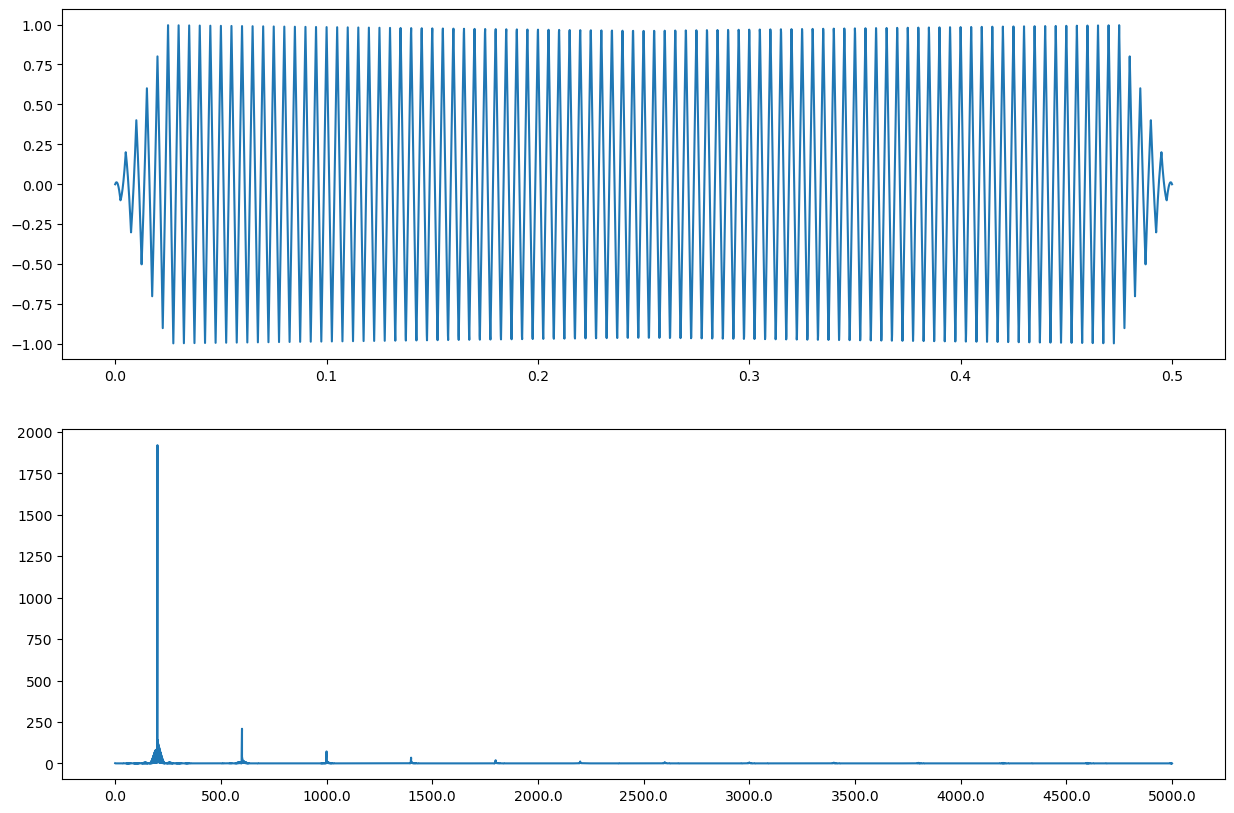

In [3]:
class Sinusoid:
    def __init__(self, freq=440, amp=1, framerate = 44000, offset=0):
        self.freq = freq
        self.amp = amp
        self.framerate = framerate
        self.offset = offset
        self.ys = []
        self.ts = []

    def normalize(self):
        self.ys = self.ys - self.ys.mean()
        high = abs(max(self.ys))
        low = abs(min(self.ys))
        self.ys = self.amp*self.ys/max(high,low)

    def apodize(self, denom=20,duration=0.1):
        n = len(self.ys)
        k1 = n//denom
        k2 = int(duration*self.framerate)
        k = min(k1,k2)
        w1 = np.linspace(0,1,k)
        w2 = np.ones(n-2*k)
        w3 = np.linspace(1,0,k)
        window = np.concatenate((w1,w2,w3))
        self.ys = self.ys*window

    def unbias(self, values):
        return values - values.mean()

    def get_fft(self):
        hs = fftpack.rfft(self.ys)
        fs = fftpack.rfftfreq(len(self.ys), 1/self.framerate)
        amps = np.absolute(hs)
        return fs,amps
        
class TriangleSignal(Sinusoid):
    def evaluate(self, ts):
        self.ts = ts
        cycles = self.freq * self.ts + self.offset/(2*np.pi)
        frac, _ = np.modf(cycles)
        self.ys = np.abs(frac - 0.5)
        return self

framerate = 10000
tri_signal = TriangleSignal(freq=200, framerate=framerate)
start_time = 0
end_time = 0.5
x_axis = np.linspace(start_time,end_time,int(framerate*(end_time-start_time)))
tri_signal = tri_signal.evaluate(x_axis)
tri_signal.normalize()
tri_signal.apodize()
fs_tri, amps_tri = tri_signal.get_fft()
fig, ax = plt.subplots(2,1)
fig.set_size_inches(15,10)
xticks = np.arange(fs_tri[0], fs_tri[-1]+500, 500)
xlabel = xticks
ax[0].plot(tri_signal.ts, tri_signal.ys)
ax[1].set_xticks(xticks,labels=xlabel)
ax[1].plot(fs_tri,amps_tri)

### Square Wave

In [4]:
class SquareSignal(Sinusoid):
    def evaluate(self, ts):
        self.ts = ts
        cycles = self.freq * self.ts + self.offset/(2*np.pi)
        frac, _ = np.modf(cycles)
        self.ys = self.amp * np.sign(self.unbias(frac))
        return self

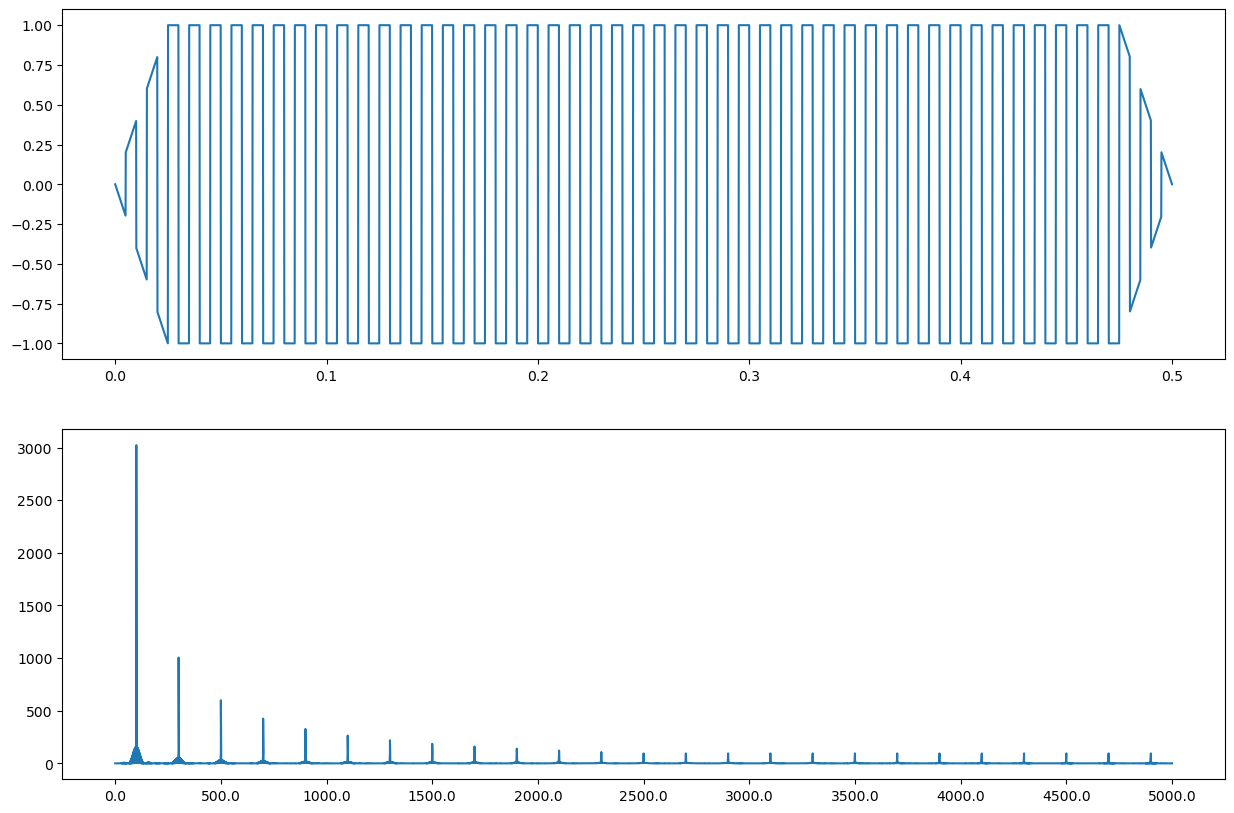

In [6]:
framerate = 10000
square_signal = SquareSignal(freq=100, framerate=framerate)
start_time = 0
end_time = 0.5
x_axis = np.linspace(start_time,end_time,int(framerate*(end_time-start_time)))
square_signal = square_signal.evaluate(x_axis)
#tri_signal.normalize()
square_signal.apodize()
fs_sq, amps_sq = square_signal.get_fft()
fig, ax = plt.subplots(2,1)
fig.set_size_inches(15,10)
xticks = np.arange(fs_sq[0], fs_sq[-1]+500, 500)
xlabel = xticks
ax[0].plot(square_signal.ts, square_signal.ys)
ax[1].set_xticks(xticks,labels=xlabel)
ax[1].plot(fs_sq,amps_sq)

### Aliasing

Aliasing is showng below. If our sampling rate is poor, two very different signals can look the same. Here our sampling rate is $10,000$ and we have two signals of frequencies $4500Hz$ and $5500Hz$ look how in the frequency domain they appear to be identical

In [7]:
class CosSignal(Sinusoid):
    def evaluate(self, ts):
        self.ts = ts
        self.ys = self.offset + self.amp*np.cos(2*np.pi*self.freq*self.ts)
        return self

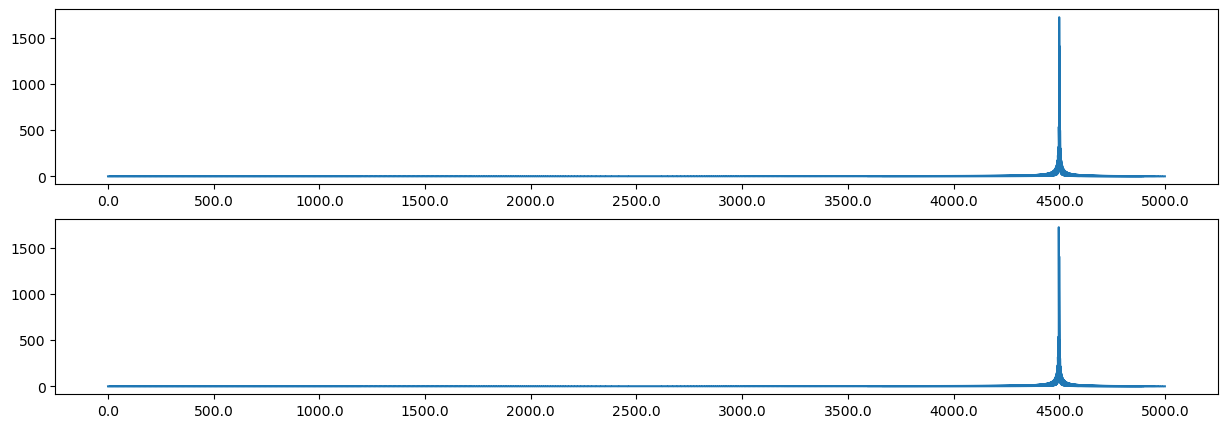

In [8]:
framerate = 10000
freq_1 = 4500
cos_signal_1 = CosSignal(freq=freq_1, framerate=framerate)
start_time = 0
end_time = 0.5
x_axis = np.linspace(start_time,end_time,int(framerate*(end_time-start_time)))
cos_signal_1 = cos_signal_1.evaluate(x_axis)
cos_signal_1.normalize()
fs_1, amps_1 = cos_signal_1.get_fft()

freq_2 = 5500
cos_signal_2 = CosSignal(freq=freq_2, framerate=framerate)
start_time = 0
end_time = 0.5
x_axis = np.linspace(start_time,end_time,int(framerate*(end_time-start_time)))
cos_signal_2 = cos_signal_2.evaluate(x_axis)
cos_signal_2.normalize()
fs_2, amps_2 = cos_signal_2.get_fft()

fig, ax = plt.subplots(2,1)
fig.set_size_inches(15,5)
xticks_1 = np.arange(fs_1[0], fs_1[-1]+500, 500)
xlabel_1 = xticks_1
xticks_2 = np.arange(fs_2[0], fs_2[-1]+500, 500)
xlabel_2 = xticks_2

ax[0].set_xticks(xticks_1,labels=xlabel_1)
ax[0].plot(fs_1,amps_1)

ax[1].set_xticks(xticks_2,labels=xlabel_2)
ax[1].plot(fs_2,amps_2)

### Exercise 2.2

Compute the spectrum of a Sawtooth signal and compare it's harmonic structure to those of triangle and square waves

In [40]:
class SawtoothSignal(Sinusoid):
    def evaluate(self, ts):
        self.ts = ts
        p = 1/self.freq
        self.ys = 2*(self.ts/p - np.floor(0.5 + self.ts/p))
        return self

In [38]:
class SawtoothSignal(Sinusoid):
    def evaluate(self, ts):
        self.ts = ts
        cycles = self.freq * self.ts + self.offset / (0.5*np.pi)
        frac, _ = np.modf(cycles)
        self.ys = self.unbias(frac)
        self.normalize()
        
        return self

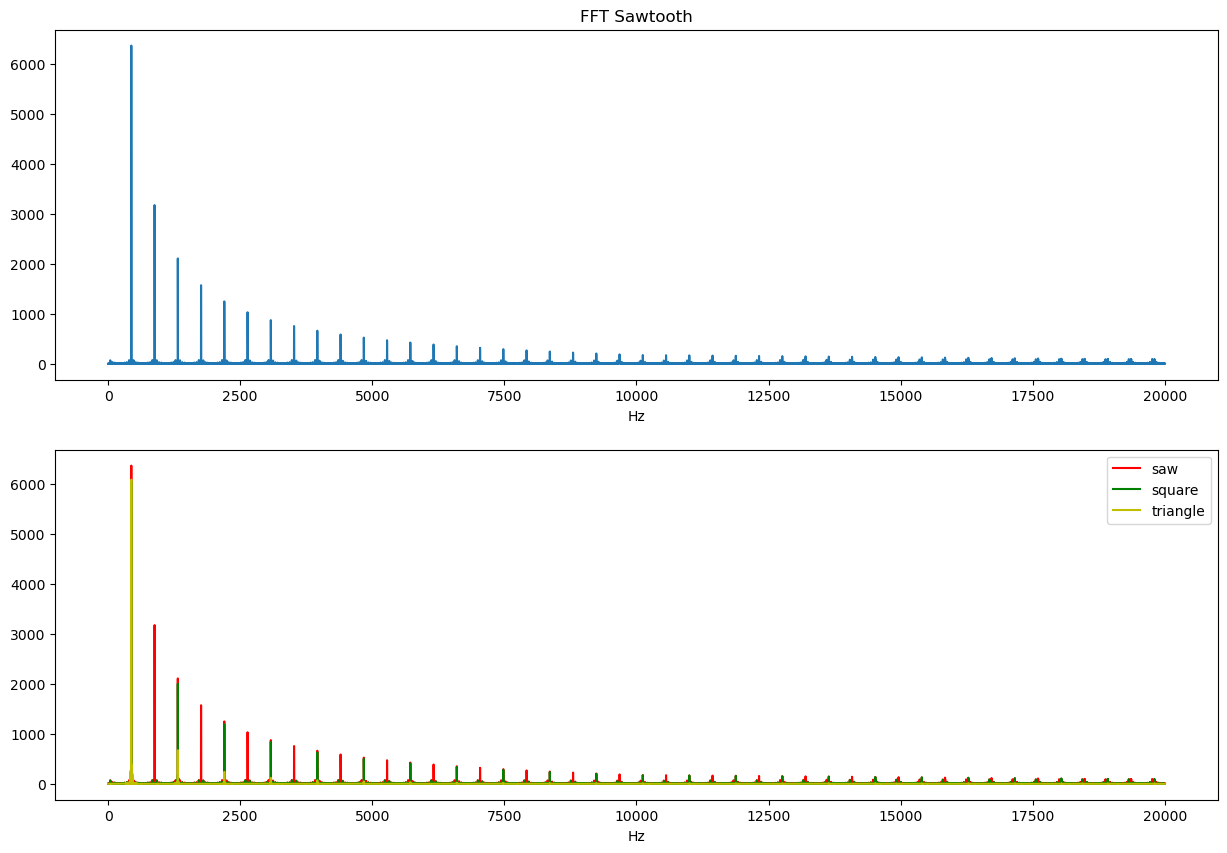

In [50]:
framerate = 40000
sawtooth_signal = SawtoothSignal(freq=440, framerate=framerate)
start_time = 0
end_time = 0.5
x_axis = np.linspace(start_time,end_time,int(framerate*(end_time-start_time)))
sawtooth_signal = sawtooth_signal.evaluate(x_axis)

# Square
square_signal = SquareSignal(freq=440, amp=0.5, framerate=framerate)
start_time = 0
end_time = 0.5
x_axis = np.linspace(start_time,end_time,int(framerate*(end_time-start_time)))
square_signal = square_signal.evaluate(x_axis)
#tri_signal.normalize()
square_signal.apodize()
fs_sq, amps_sq = square_signal.get_fft()

#Triangle
tri_signal = TriangleSignal(freq=440, amp=0.79, framerate=framerate)
start_time = 0
end_time = 0.5
x_axis = np.linspace(start_time,end_time,int(framerate*(end_time-start_time)))
tri_signal = tri_signal.evaluate(x_axis)
tri_signal.normalize()
tri_signal.apodize()
fs_tri, amps_tri = tri_signal.get_fft()

fs_saw, amps_saw = sawtooth_signal.get_fft()
fig.set_size_inches(15,10)
xticks = np.arange(fs_saw[0], fs_saw[-1]+500, 500)
xlabel = xticks
fig, ax = plt.subplots(2,1)
fig.set_size_inches(15,10)
ax[0].plot(fs_saw, amps_saw)
ax[1].plot(fs_saw, amps_saw, color='r', label='saw')
ax[1].plot(fs_sq, amps_sq, color='g', label='square')
ax[1].plot(fs_tri, amps_tri, color='y', label='triangle')
ax[0].set_xlabel("Hz")
ax[1].set_xlabel("Hz")
ax[0].set_title("FFT Sawtooth")
ax[1].legend()

### Exercise 2.3 

Make a square signal at 1100 Hz and make a wave that samples
it at 10000 frames per second. If you plot the spectrum, you can see that
most of the harmonics are aliased. When you listen to the wave, can you
hear the aliased harmonics?

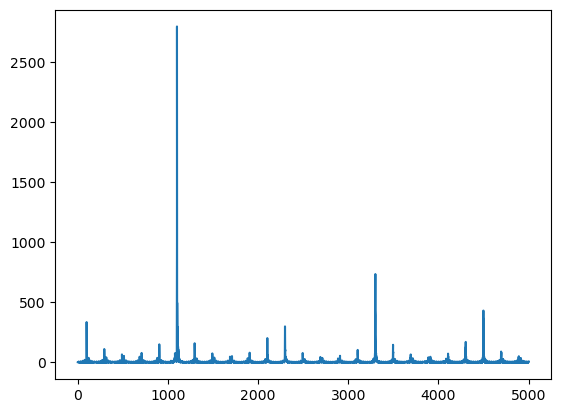

In [52]:
framerate = 10000
square_signal = SquareSignal(freq=1100, amp=1.0, framerate=framerate)
start_time = 0
end_time = 0.5
x_axis = np.linspace(start_time,end_time,int(framerate*(end_time-start_time)))
square_signal = square_signal.evaluate(x_axis)
#tri_signal.normalize()
square_signal.apodize()
fs_sq, amps_sq = square_signal.get_fft()
plt.plot(fs_sq, amps_sq)